
# **AEROFIT🏋 - DESCRIPTIVE STATISTICS & PROBABILITY💹**


# **About Aerofit💪**  

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

# **Business Problem👀**

The market research team at AeroFit wants to
* Identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.
* The team decides to investigate whether there are differences across the product with respect to customer characteristics

# **Objective🎯**

Perform descriptive analytics to create a customer profile for each

* AeroFit treadmill product by developing appropriate tables and charts.
* For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

# **About Dataset🧻**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior **three months**. The dataset has the following features:

**Product Portfolio:**

* The **KP281** is an entry-level treadmill that sells for **$1,500**.

* The **KP481** is for mid-level runners that sell for **$1,750**.

* The **KP781** treadmill is having advanced features that sell for **$2,500**.


# **Getting help from Libraries📚**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the data....⏯**

In [2]:
df = pd.read_csv('aerofit_treadmill.csv')

# **Exploring the data...🔎**

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.shape

(180, 9)

**🔍OBSERVATION🔎**

The Dataset has 180 rows and 9 columns.

* **Product Purchased:**	KP281, KP481, or KP781
* **Age:** In years
* **Gender:** Male/Female
* **Education:** In years
* **MaritalStatus:**	Single or partnered
* **Usage**: The average number of times the customer plans to use the  treadmill each week.
* **Income:**	Annual income (in $)
* **Fitness:**	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* **Miles:**	The average number of miles the customer expects to walk/run each week

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**🔍OBSERVATION🔎**

* The columns **Product**, **Gender** and **MaritalStatus** are **object** datatype.
* The columns **Age**, **Education**, **Usage**, **Fitness**, **Income** and **Miles** are **int64** datatype

# **Descriptive statistics📃**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


**🔍OBSERVATION🔎**

* **Age:** The range is between **18 years to 50 years** and the average age is **29 years**.

* **Education:** The range is between **12 years to 21 years** and the average education is **16 years**.

* **Usage:** The customer use the treadmill from **2 to 7 times** a week with the average usage of **3 times** per week.

* **Fitness:** In the Self-rated fitness on a **1-to-5 scale**, where **1 is the poor shape** and **5 is the excellent shape**, the average fitness is **3**.

* **Income:** The range of anual income is between **30,000 USD TO 105,000 USD** and the average income is **54,000 USD**.

* **Miles:** The customer expects to walk/run each week in the range between **21 miles to 360 miles** with average of **103 miles**.

In [7]:
df.describe(include = "object").T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


**🔍OBSERVATION🔎**

For the past three months, the **highest sales**💰 contribution were from

* The **KP281** is an entry-level treadmill.

* The **Male buyers** ♂ were more than the female buyers.

* The **Married buyers**💍 were more than the single.

# **Checking the missing values and Nulls🔎**

In [8]:
#Checking for duplicates:
df.duplicated().sum()

0

In [9]:
#Checking for nulls:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

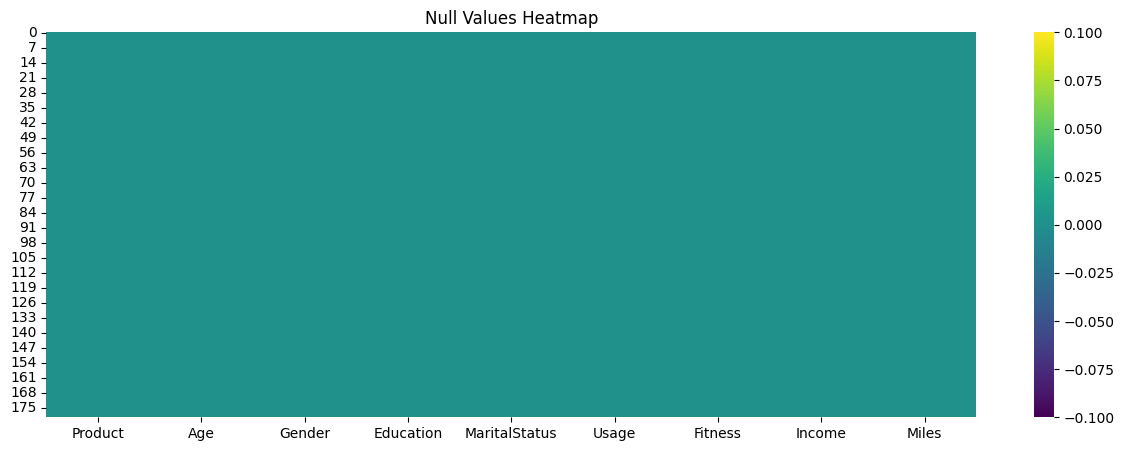

In [10]:
#Null value heatmap:
plt.figure(figsize = (15,5))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()

**🔍OBSERVATION🔎**

There are no duplicates and null values in the dataset.

# **Detect Outliers🕵**

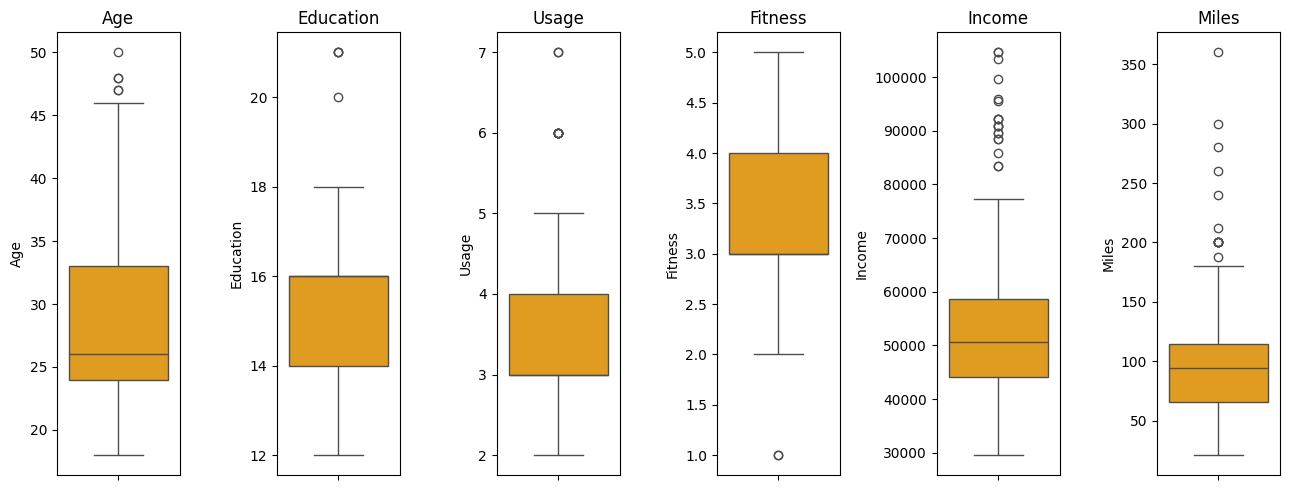

In [11]:
# Create box plots for each continuous variable

continuous_vars = df.select_dtypes(include=['int64'])
plt.figure(figsize=(13, 5))
for i, col in enumerate(continuous_vars.columns):
    plt.subplot(1, len(continuous_vars.columns), i+1)
    sns.boxplot(df[col], color='orange')
    plt.title(col)
plt.tight_layout()
plt.show()

In [12]:
columns_to_check = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

#Function to calculate percentage of outliers
def detect_outliers_and_percentage(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    percentage_outliers = (len(outliers) / len(df)) * 100
    return percentage_outliers

# calculate percentage of outliers
for col in columns_to_check:
    percentage = detect_outliers_and_percentage(col)
    print(f"Percentage of outliers in column '{col}': {percentage:.2f}%")
    print()

Percentage of outliers in column 'Age': 2.78%

Percentage of outliers in column 'Education': 2.22%

Percentage of outliers in column 'Usage': 5.00%

Percentage of outliers in column 'Fitness': 1.11%

Percentage of outliers in column 'Income': 10.56%

Percentage of outliers in column 'Miles': 7.22%



# **Univariate Analysis📊**

In [4]:
#Creating Fitness_Shape column:
def cat(x):
  if x == 1:
    return "Poor"
  if x == 2:
    return "Bad"
  if x == 3:
    return "Average"
  if x == 4:
    return "Good"
  else:
    return "Excellent"

df["Fitness_Shape"] = df["Fitness"].apply(cat)

In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_Shape
0,KP281,18,Male,14,Single,3,4,29562,112,Good
1,KP281,19,Male,15,Single,2,3,31836,75,Average
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average
3,KP281,19,Male,12,Single,3,3,32973,85,Average
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad


**Note📓**

**Fitness_Shape** column is newly created based on the Fitness column.

* 5 - Excellent
* 4 - Good
* 3 - Average
* 2 - Bad
* 1 - Poor

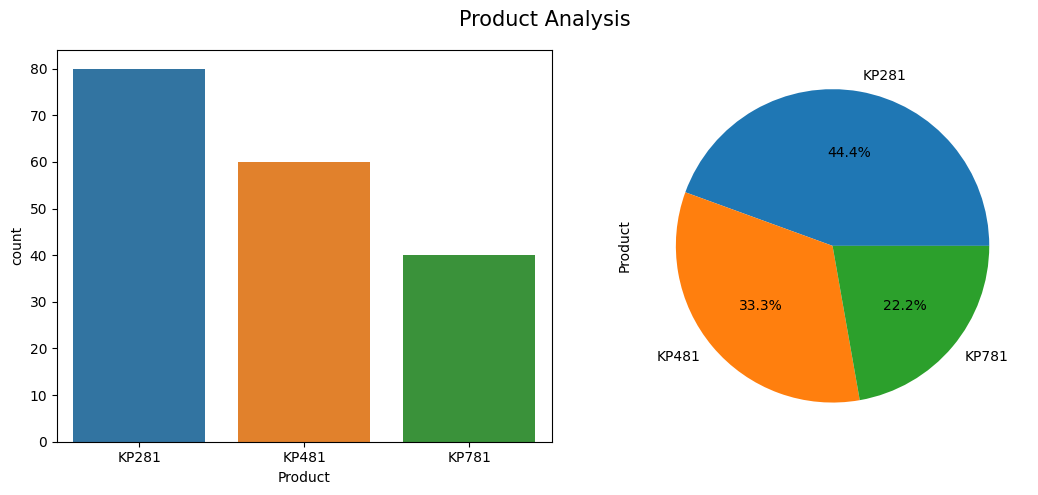

In [15]:
#Product Analysis:
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
sns.countplot(x = "Product", data = df, hue="Product")

plt.subplot(1, 2, 2)
df["Product"].value_counts(normalize=True).plot(kind = "pie", autopct = "%1.1f%%")

plt.suptitle("Product Analysis", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

From the above analysis we can conclude that,

* 🥇 The **KP281** is an entry-level treadmill that sells for **$1,500** has contributed about **44%** of the overall sales🤑

* 🥈 The **KP481** is for mid-level runners that sell for **$1,750** has contributed about **33%** of the overall sales💰

* 🥉 The **KP781** treadmill is having advanced features that sell for **$2,500** has contributed about **22%** of the overall sales💰

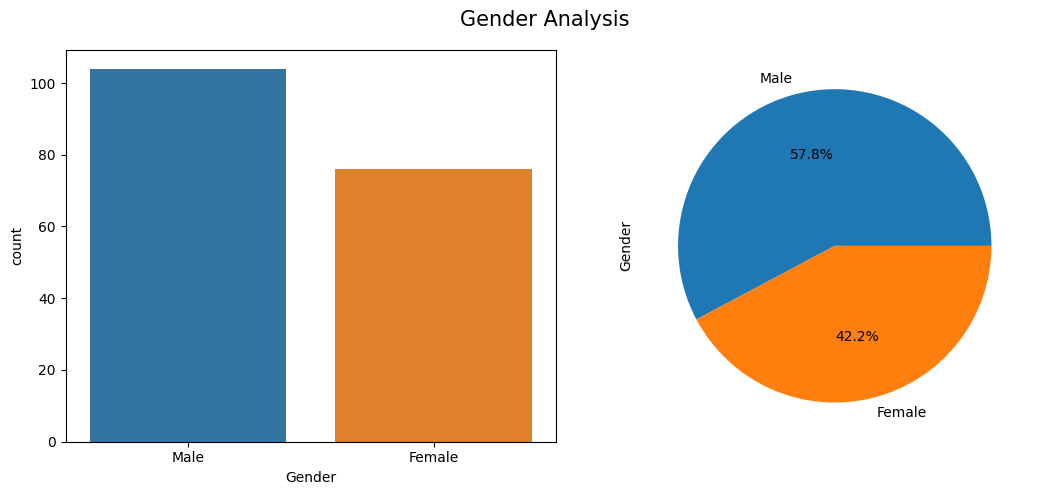

In [16]:
#Gender Analysis:
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
sns.countplot(x = "Gender", data = df, hue="Gender")

plt.subplot(1, 2, 2)
df["Gender"].value_counts(normalize=True).plot(kind = "pie", autopct = "%1.1f%%")

plt.suptitle("Gender Analysis", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

From the above analysis we can conclude that,

* 🥇 **Male** ♂ has contributed about **58%** of the overall sales🤑

* 🥈 **Female** ♀ has contributed about **42%** of the overall sales💰

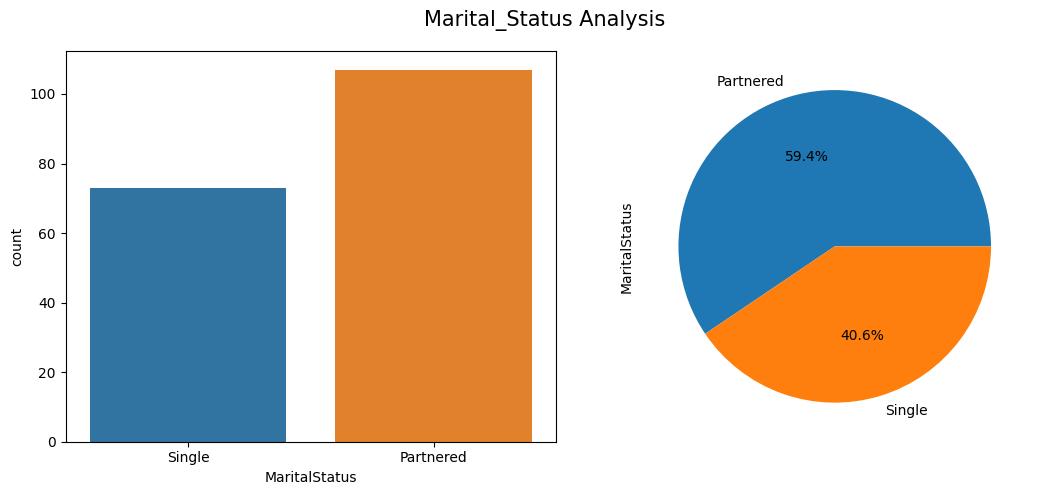

In [17]:
#Marital_Status Analysis:
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
sns.countplot(x = "MaritalStatus", data = df, hue="MaritalStatus")

plt.subplot(1, 2, 2)
df["MaritalStatus"].value_counts(normalize=True).plot(kind = "pie", autopct = "%1.1f%%")

plt.suptitle("Marital_Status Analysis", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

From the above analysis we can conclude that,

* 🥇 **Partnered** has contributed about **59%** of the overall sales🤑. This is may be to maintain a **healthy relationship**💪😀

* 🥈 **Single** has contributed about **41%** of the overall sales💰

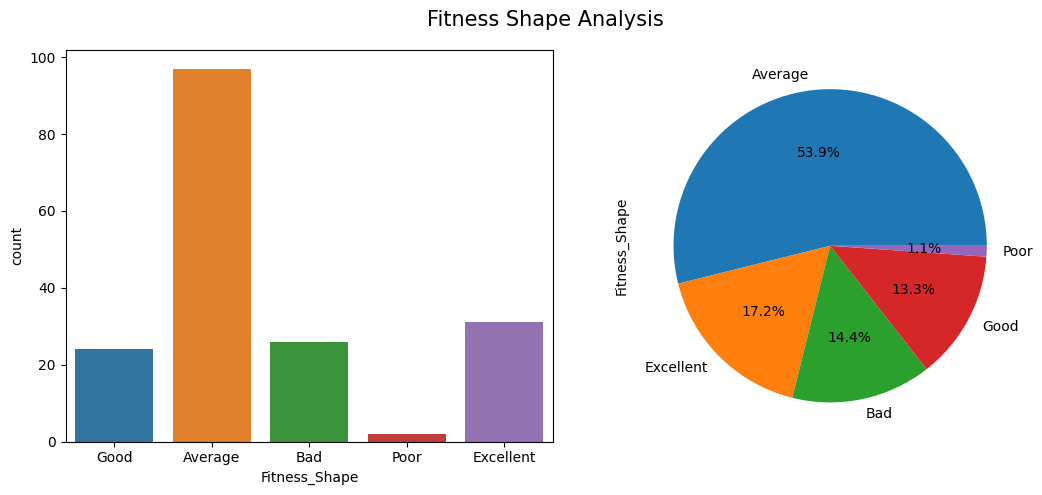

In [18]:
#Fitness Shape Analysis:
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
sns.countplot(x = "Fitness_Shape", data = df, hue="Fitness_Shape")

plt.subplot(1, 2, 2)
df["Fitness_Shape"].value_counts(normalize=True).plot(kind = "pie", autopct = "%1.1f%%")

plt.suptitle("Fitness Shape Analysis", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

From the above analysis we can conclude that in the Self-rated fitness on a 1-to-5 scale, the person with

* 🥇 The **Avarage shape(3)** has contributed around **54%** of the overall sales🤑

* 🥈 The **Excellent shape(5)** has contributed around **17%** of the overall sales💰

* 🥉 The **Bad shape(2)** has contributed around **14%** of the overall sales💰

* The **God shape(4)** has contributed around **13%** of the overall sales💰

* The **Poor shape(1)** has contributed around **1%** of the overall sales💰

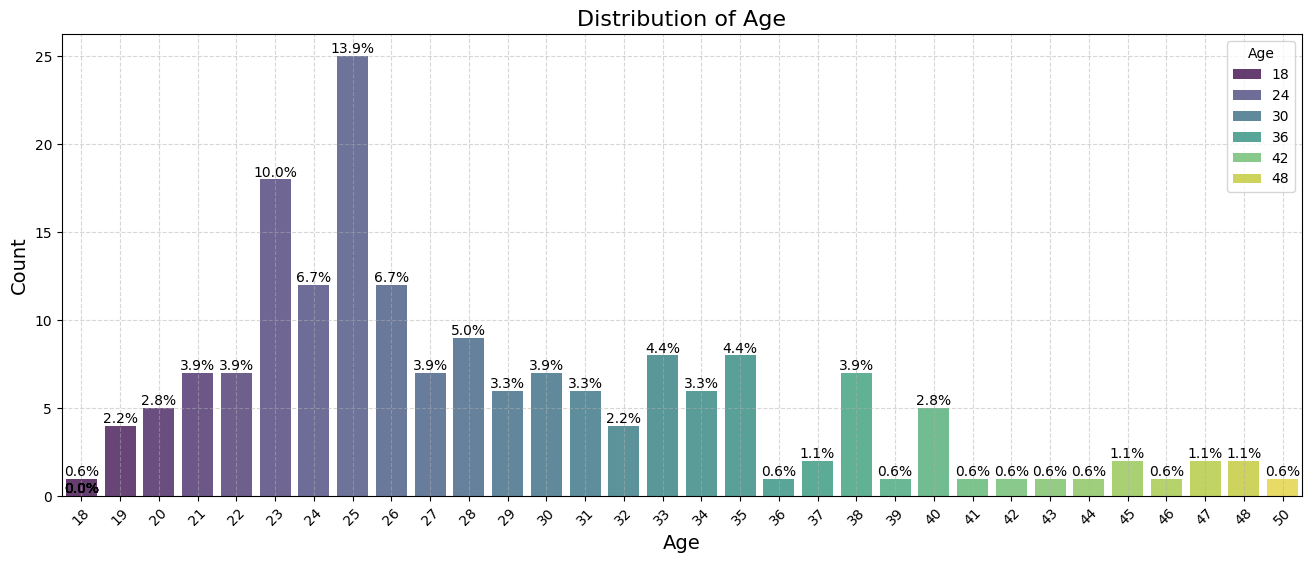

In [19]:
#Distribution of Age

# Create the count plot
plt.figure(figsize=(16, 6))
ax = sns.countplot(x = "Age", data = df, palette="viridis", hue = "Age", alpha=0.8)

# Set plot title and axis labels
plt.title("Distribution of Age", fontsize=16)

# Adjust tick labels
plt.xticks(rotation=45, fontsize=10)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Calculate the percentage contribution of each age category
total_count = len(df)
for patch in ax.patches:
    height = patch.get_height()
    pct = (height / total_count) * 100
    ax.annotate(f'{pct:.1f}%', (patch.get_x() + patch.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the title and axis labels of the plot
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

**🔍OBSERVATION🔎**

From the above analysis we can conclude that,

* 🥇 The person with the age of **25 years** has contributed around **14%** of the overall sales🤑

* 🥈 The person with the age of **23 years** has contributed around **10%** of the overall sales💰

* 🥉 The person with the age of **24 years** and **26 years** has contributed around **7%** of the overall sales💰

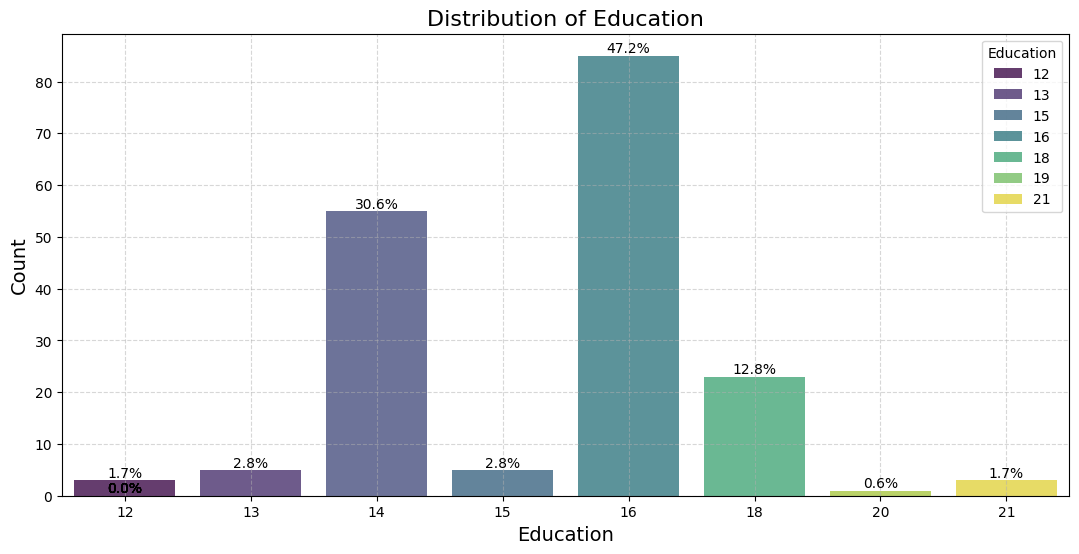

In [20]:
#Distribution of Education

# Create the count plot
plt.figure(figsize=(13, 6))
ax = sns.countplot(x = "Education", data = df, palette="viridis", hue = "Education", alpha=0.8)

# Set plot title and axis labels
plt.title("Distribution of Education", fontsize=16)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Calculate the percentage contribution of each age category
total_count = len(df)
for patch in ax.patches:
    height = patch.get_height()
    pct = (height / total_count) * 100
    ax.annotate(f'{pct:.1f}%', (patch.get_x() + patch.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the title and axis labels of the plot
plt.title("Distribution of Education", fontsize=16)
plt.xlabel("Education", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

**🔍OBSERVATION🔎**

From the above analysis we can conclude that,

* 🥇 The Education of **16 years** has contributed around **47%** of the overall sales🤑

* 🥈 The Education of **14 years** has contributed around **31%** of the overall sales💰

* 🥉 The Education of **18 years** has contributed around **13%** of the overall sales💰

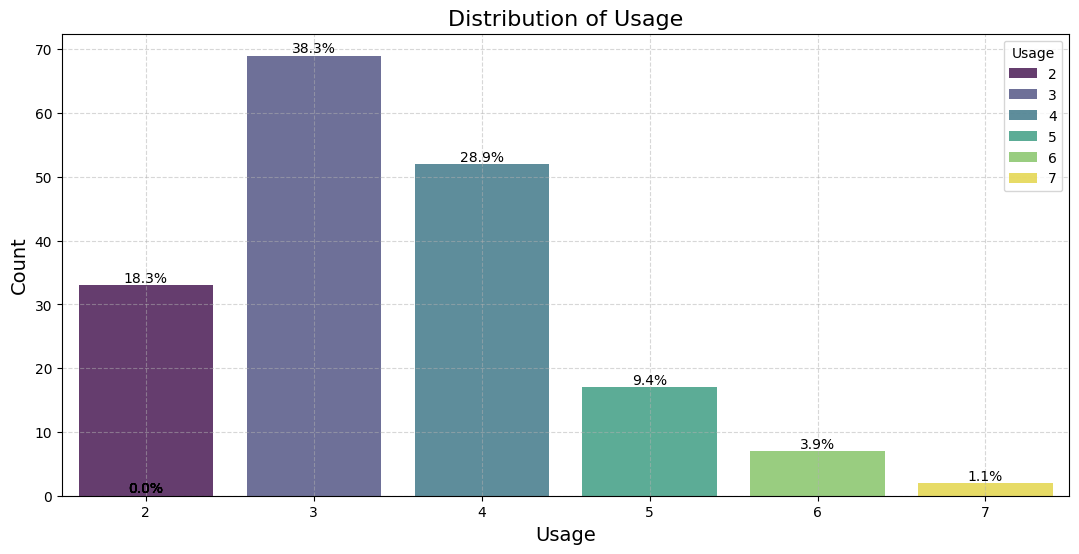

In [21]:
#Distribution of Usage

# Create the count plot
plt.figure(figsize=(13, 6))
ax = sns.countplot(x = "Usage", data = df, palette="viridis", hue = "Usage", alpha=0.8)

# Set plot title and axis labels
plt.title("Distribution of Usage", fontsize=16)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Calculate the percentage contribution of each age category
total_count = len(df)
for patch in ax.patches:
    height = patch.get_height()
    pct = (height / total_count) * 100
    ax.annotate(f'{pct:.1f}%', (patch.get_x() + patch.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the title and axis labels of the plot
plt.title("Distribution of Usage", fontsize=16)
plt.xlabel("Usage", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

**🔍OBSERVATION🔎**

From the above analysis we can conclude that the person who uses the treadmill,

* 🥇 **3 times** each week has contributed around **38%** of the overall sales 🤑

* 🥈 **4 times** each week has contributed around **29%** of the overall sales💰

* 🥉 **2 times** each week has contributed around **18%** of the overall sales💰

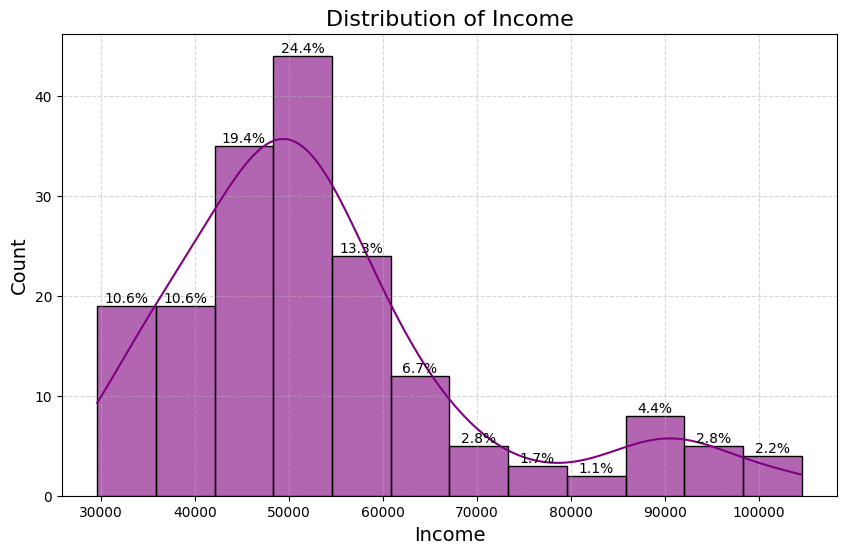

In [22]:
#Distribution of Income

plt.figure(figsize=(10, 6))
ax = sns.histplot(x="Income", bins=12, data=df, kde=True, color="purple", alpha=0.6)

# Calculate the percentage contribution of each income category
total_count = len(df)
for patch in ax.patches:
    height = patch.get_height()
    pct = (height / total_count) * 100
    plt.text(patch.get_x() + patch.get_width() / 2., height, f'{pct:.1f}%', ha='center', va='bottom')

# Set plot title and axis labels
plt.title("Distribution of Income", fontsize=16)
plt.xlabel("Income", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()

**🔍OBSERVATION🔎**

From the above analysis we can conclude that the person who uses the treadmill,
* The people between the income group💸 of around **45K USD and 55K USD** has contrubuted around **57%** of the overall sales💰

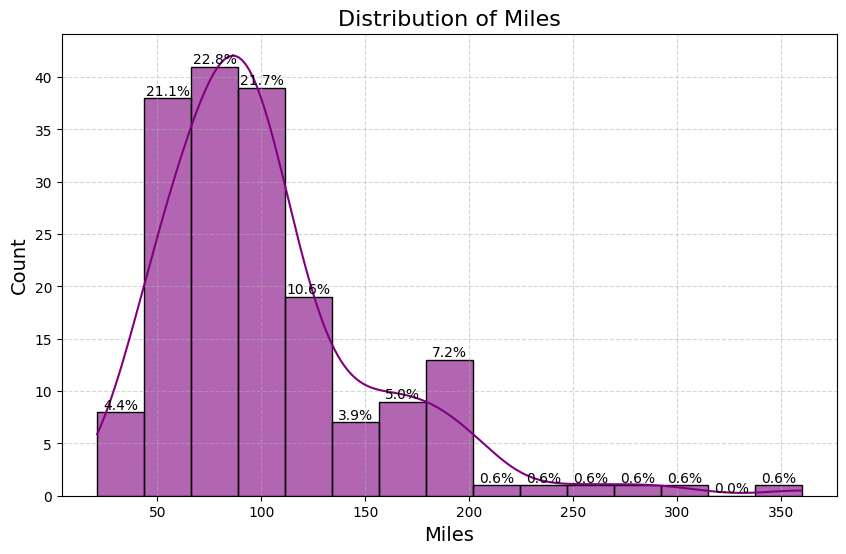

In [23]:
#Distribution of Miles

plt.figure(figsize=(10, 6))
ax = sns.histplot(x="Miles", bins=15, data=df, kde=True, color="purple", alpha=0.6)

# Calculate the percentage contribution of each income category
total_count = len(df)
for patch in ax.patches:
    height = patch.get_height()
    pct = (height / total_count) * 100
    plt.text(patch.get_x() + patch.get_width() / 2., height, f'{pct:.1f}%', ha='center', va='bottom')

# Set plot title and axis labels
plt.title("Distribution of Miles", fontsize=16)
plt.xlabel("Miles", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()

**🔍OBSERVATION🔎**

* From the above analysis we can conclude that the customers who **walk🚶/run🏃50 to 100 miles**| each week has contributed around **66%** of the overall sales💰

# **Bivariate Analysis📊**

In [24]:
 medians = df.groupby(['Product', 'Gender'])['Age'].median().reset_index()
 medians

,Product,Gender,Age
0,KP281,Female,26.5
1,KP281,Male,26.0
2,KP481,Female,29.0
3,KP481,Male,25.0
4,KP781,Female,26.0
5,KP781,Male,27.0


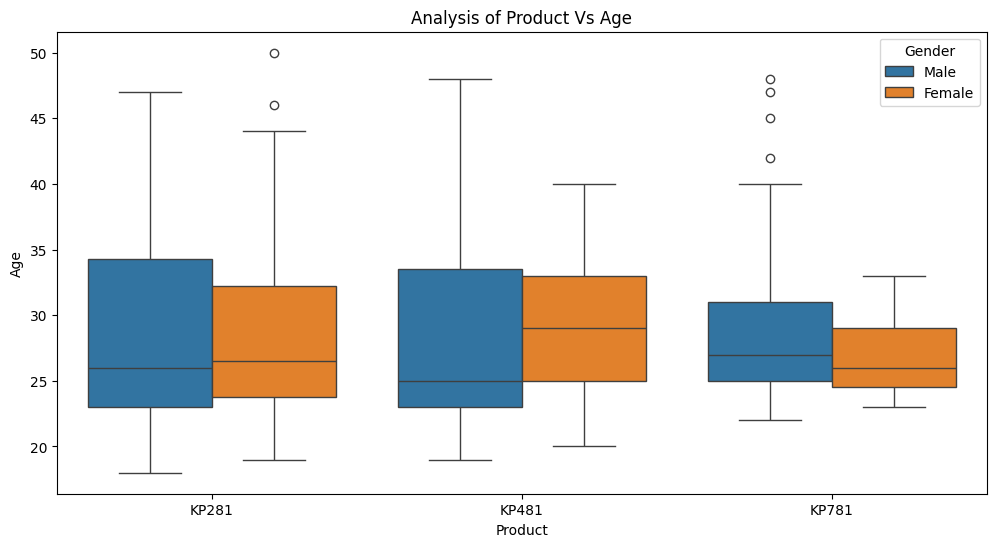

In [25]:
# Analysis of Product Vs Age:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Age',hue = "Gender", data=df)
plt.title('Analysis of Product Vs Age')
plt.xlabel('Product')
plt.ylabel('Age')
plt.show()

**🔍OBSERVATION for KP281 treadmill**🔎
* Median age for **male** is **26 years**
* Median age for **female** is **26 years**

Both male and female are of with same age group prefer **KP281 treadmill**

**🔍OBSERVATION for KP481 treadmill**🔎
* Median age for **male** is **25 years**
* Median age for **female** is **29 years**

When compared to male little elder female are prefering **KP481 treadmill**


**🔍OBSERVATION for KP781 treadmill**🔎
* Median age for **male** is **27 years**
* Median age for **female** is **26 years**

When compared to female little elder male are prefering **KP781 treadmill**



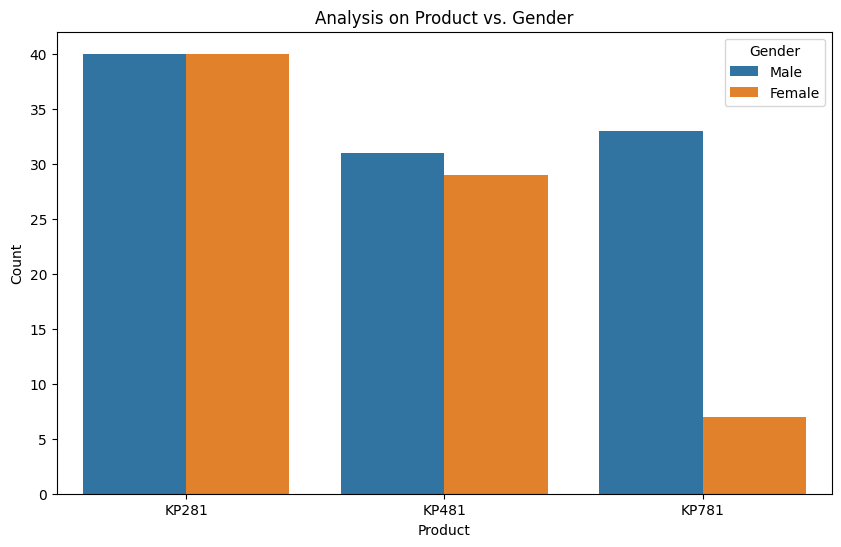

In [26]:
# Analysis of Product Vs Gender:

plt.figure(figsize=(10, 6))
sns.countplot(x='Product', hue='Gender', data=df)

plt.title('Analysis on Product vs. Gender')
plt.xlabel('Product')
plt.ylabel('Count')

plt.legend(title='Gender')
plt.show()

**🔍OBSERVATION🔎**

* Both Male and Female are **equally** preferring **KP281 treadmill**.
* When compared to Female, **more Male are preferring KP481 treadmill**.
* When compared to Female, **more Male are preferring KP781 treadmill**.

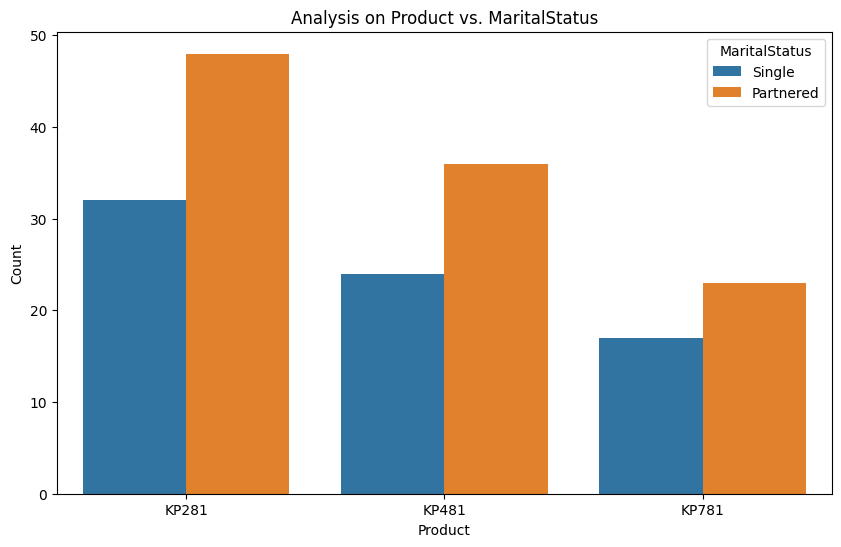

In [27]:
# Analysis of Product Vs MaritalStatus:

plt.figure(figsize=(10, 6))
sns.countplot(x = "Product", data = df, hue = "MaritalStatus")

plt.title('Analysis on Product vs. MaritalStatus')
plt.xlabel('Product')
plt.ylabel('Count')

plt.legend(title='MaritalStatus')
plt.show()

**🔍OBSERVATION🔎**

* When compared to Single, **Partnered** people are preferring **KP281 treadmill**
* When compared to Single, **Partnered** people are preferring **KP481 treadmill**
*When compared to Single, **Partnered** people are preferring **KP781 treadmill**



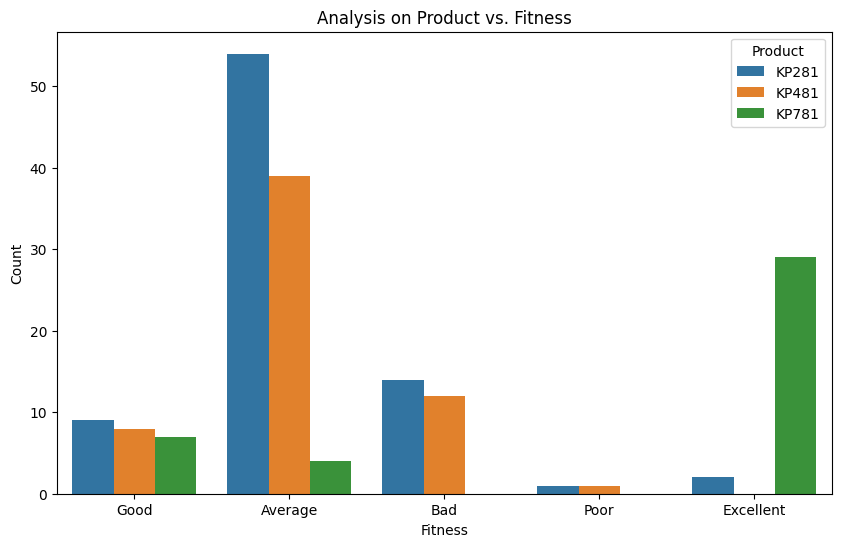

In [28]:
# Analysis of Product Vs Fitness:

plt.figure(figsize=(10, 6))
sns.countplot(x = "Fitness_Shape", data = df, hue="Product")

plt.title('Analysis on Product vs. Fitness')
plt.xlabel('Fitness')
plt.ylabel('Count')

plt.legend(title='Product')
plt.show()

🔍OBSERVATION🔎

From the above analysis we can conclude that in the Self-rated fitness on a 1-to-5 scale, the person

**The Good shape**:
* First preference is **KP281 treadmill**
* Second Preference is **KP481 treadmill**
* Third preference is **KP781 treadmill**

**The Average shape:**
* First preference is **KP281 treadmill**
* Second Preference is **KP481 treadmill**
* Third preference is **KP781 treadmill**

The people having Average shape **mostly prefer KP281 and KP481 treadmill** when compared to KP781 treadmill.

**The Bad shape:**
* First preference is **KP281 treadmill**
* Second Preference is **KP481 treadmill**

The people with Bad shape don't prefer KP781 treadmill.

**The Poor shape:**

The people with poor shape **equally prefer KP281 and KP481 treadmill**.

**The Bad shape:**
* First preference is **KP781 treadmill**
* Second Preference is **KP281 treadmill**

The people with Bad shape don't prefer KP481 treadmill.







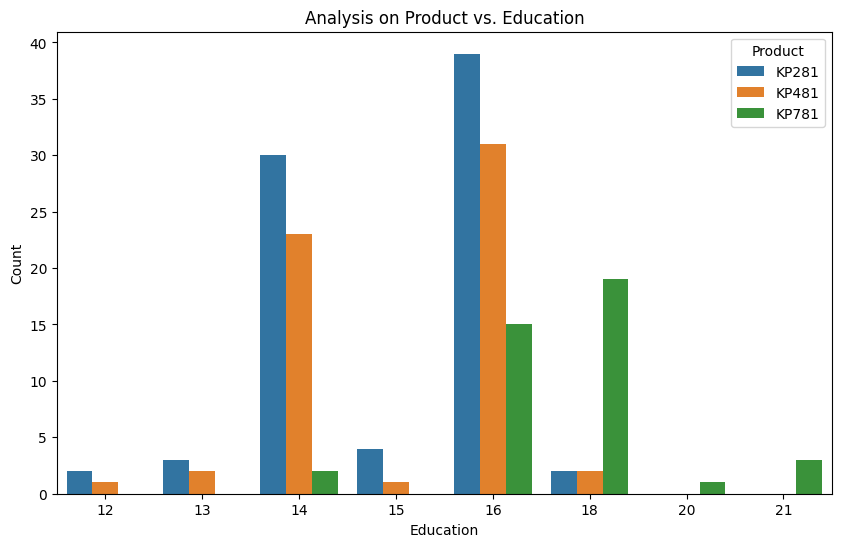

In [29]:
# Analysis of Product Vs Education:

plt.figure(figsize=(10, 6))
sns.countplot(x = "Education", data = df, hue="Product")

plt.title('Analysis on Product vs. Education')
plt.xlabel('Education')
plt.ylabel('Count')

plt.legend(title='Product')
plt.show()

**🔍OBSERVATION for KP281 treadmill**🔎

As per the above analysis,

* The First preference is **16 years**.
* Second Preference is **14 years**.
* Third preference is **15 years**.

**🔍OBSERVATION for KP481 treadmill**🔎

As per the above analysis,

* The First preference is **16 years**.
* Second Preference is **14 years**.
* Third preference is **13 years**.

**🔍OBSERVATION for KP781 treadmill**🔎

As per the above analysis,

* The First preference is **18 years**.
* Second Preference is **16 years**.
* Third preference is **21 years**.



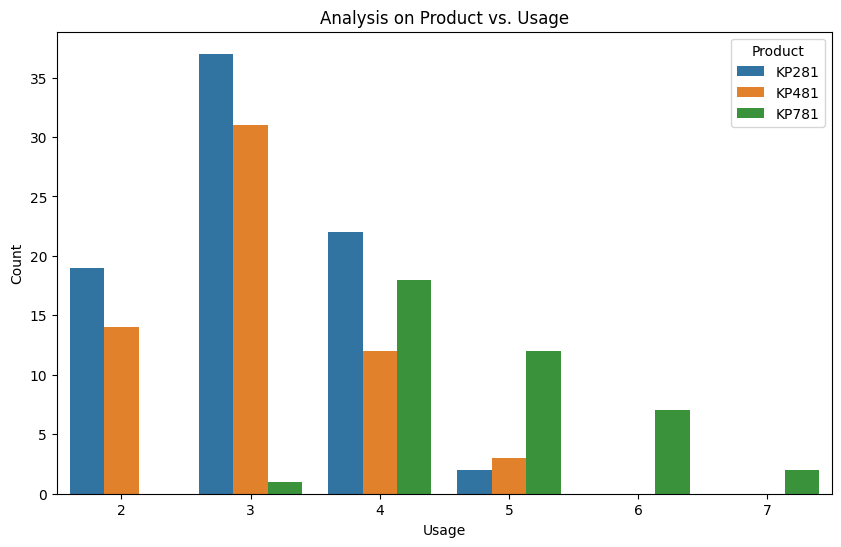

In [30]:
# Analysis of Product Vs Usage:

plt.figure(figsize=(10, 6))
sns.countplot(x = "Usage", data = df, hue="Product")

plt.title('Analysis on Product vs. Usage')
plt.xlabel('Usage')
plt.ylabel('Count')

plt.legend(title='Product')
plt.show()

**🔍OBSERVATION for KP281 treadmill**🔎

* **First prefernce** is for the customers who use the treadmill for an average of **3 times a week**.
* **Second prefernce** is for the customers who use the treadmill for an average of **4 times a week**.
* **Third prefernce** is for the customers who use the treadmill for an average of **2 times a week**.

**🔍OBSERVATION for KP481 treadmill**🔎

* **First prefernce** is for the customers who use the treadmill for an average of **3 times a week**.
* **Second prefernce** is for the customers who use the treadmill for an average of **2 times a week**.
* **Third prefernce** is for the customers who use the treadmill for an average of **4 times a week**.

**🔍OBSERVATION for KP781 treadmill**🔎

* **First prefernce** is for the customers who use the treadmill for an average of **4 times a week**.
* **Second prefernce** is for the customers who use the treadmill for an average of **5 times a week**.
* **Third prefernce** is for the customers who use the treadmill for an average of **6 times a week**.





In [31]:
# Analysis of Income Vs Gender:

df.groupby(["Product", "Gender"])["Income"].median().reset_index()

,Product,Gender,Income
0,KP281,Female,46048.5
1,KP281,Male,46617.0
2,KP481,Female,48891.0
3,KP481,Male,50028.0
4,KP781,Female,69721.0
5,KP781,Male,77191.0


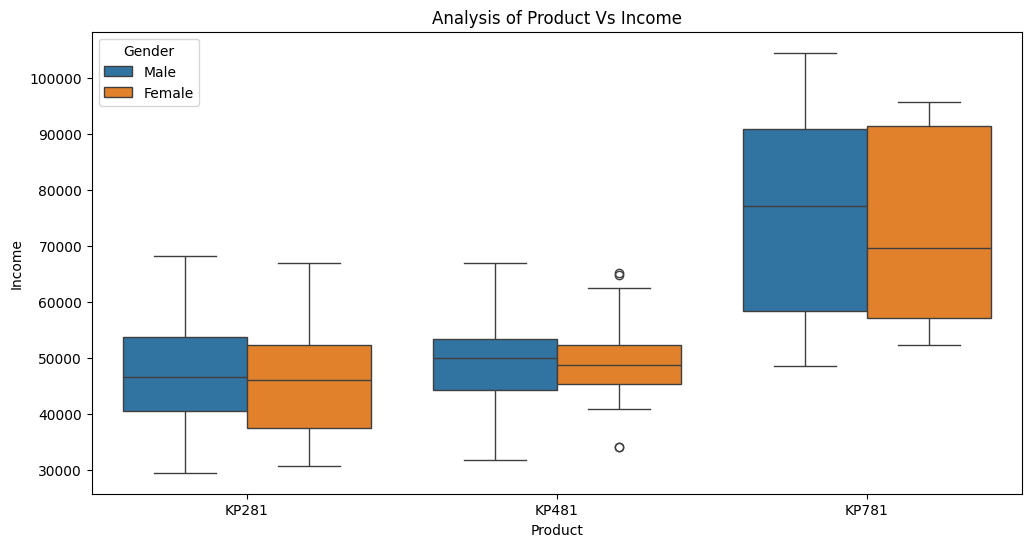

In [32]:
# Analysis of Income Vs Gender:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Income',hue = "Gender", data=df)
plt.title('Analysis of Product Vs Income')
plt.xlabel('Product')
plt.ylabel('Income')
plt.show()

**🔍OBSERVATION for KP281 treadmill**🔎

The **median income** of male and female having **46000 USD** prefer **KP281 treadmill** and the male income is little bit high than female.

**🔍OBSERVATION for KP481 treadmill**🔎

The **median income** of **male** having **50000 USD** and **female** having **49000 USD** prefer **KP481 treadmill** and the male income is little bit high than female.

**🔍OBSERVATION for KP781 treadmill**🔎

The **median income** of **male** having **77000 USD** and **female** having **70000 USD** prefer **KP781 treadmill** and the male income is high than female.

**CONCLUSION😃**
* The people with the income between **45000 to 50000 USD**💸 prefer both **KP281 and KP481 treadmill**.
* The people with the high income **above 70000 USD**💰 prefer both **KP781 treadmill**.

In [33]:
df.groupby(["Product", "MaritalStatus"])["Income"].median().reset_index()

,Product,MaritalStatus,Income
0,KP281,Partnered,46617.0
1,KP281,Single,43774.5
2,KP481,Partnered,51165.0
3,KP481,Single,47185.5
4,KP781,Partnered,85906.0
5,KP781,Single,58516.0


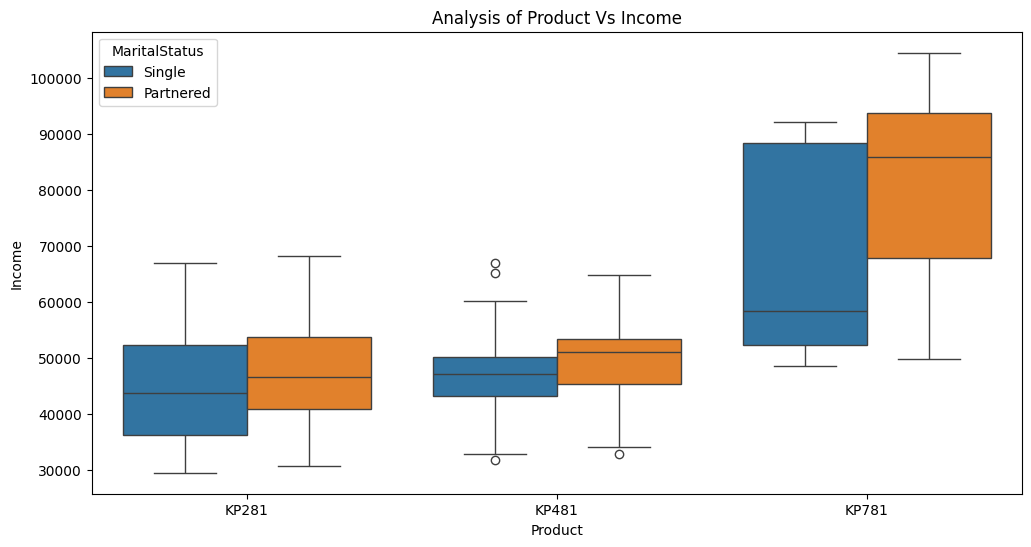

In [34]:
# Analysis of Income Vs MaritalStatus:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Income',hue = "MaritalStatus", data=df)
plt.title('Analysis of Product Vs Income')
plt.xlabel('Product')
plt.ylabel('Income')
plt.show()

**🔍OBSERVATION for KP281 treadmill**🔎

The **median income** of **single** having **44000 USD** and **partnered** having **47000 USD** prefer **KP281 treadmill** and the partnered having more income higher than single prefer KP281.

**🔍OBSERVATION for KP481 treadmill**🔎

The **median income** of **single** having **47000 USD** and **partnered** having **51000 USD** prefer **KP481 treadmill** and the partnered having more income higher than single prefer KP481.

**🔍OBSERVATION for KP781 treadmill**🔎

The **median income** of **single** having **59000 USD** and **partnered** having **86000 USD** prefer **KP781 treadmill** and the partnered having more income higher than single prefer KP781.

**CONCLUSION😃**
* The **single and partnered** having median income income in between **44000 and 51000 USD**💸 prefer both **KP281 and KP481 treadmill**.
* The **single and partnered** having high median income income in between **60000 and 86000 USD**💰 prefer both **KP781 treadmill**.

# **Correlation Analysis🤝**

<Figure size 1000x500 with 0 Axes>

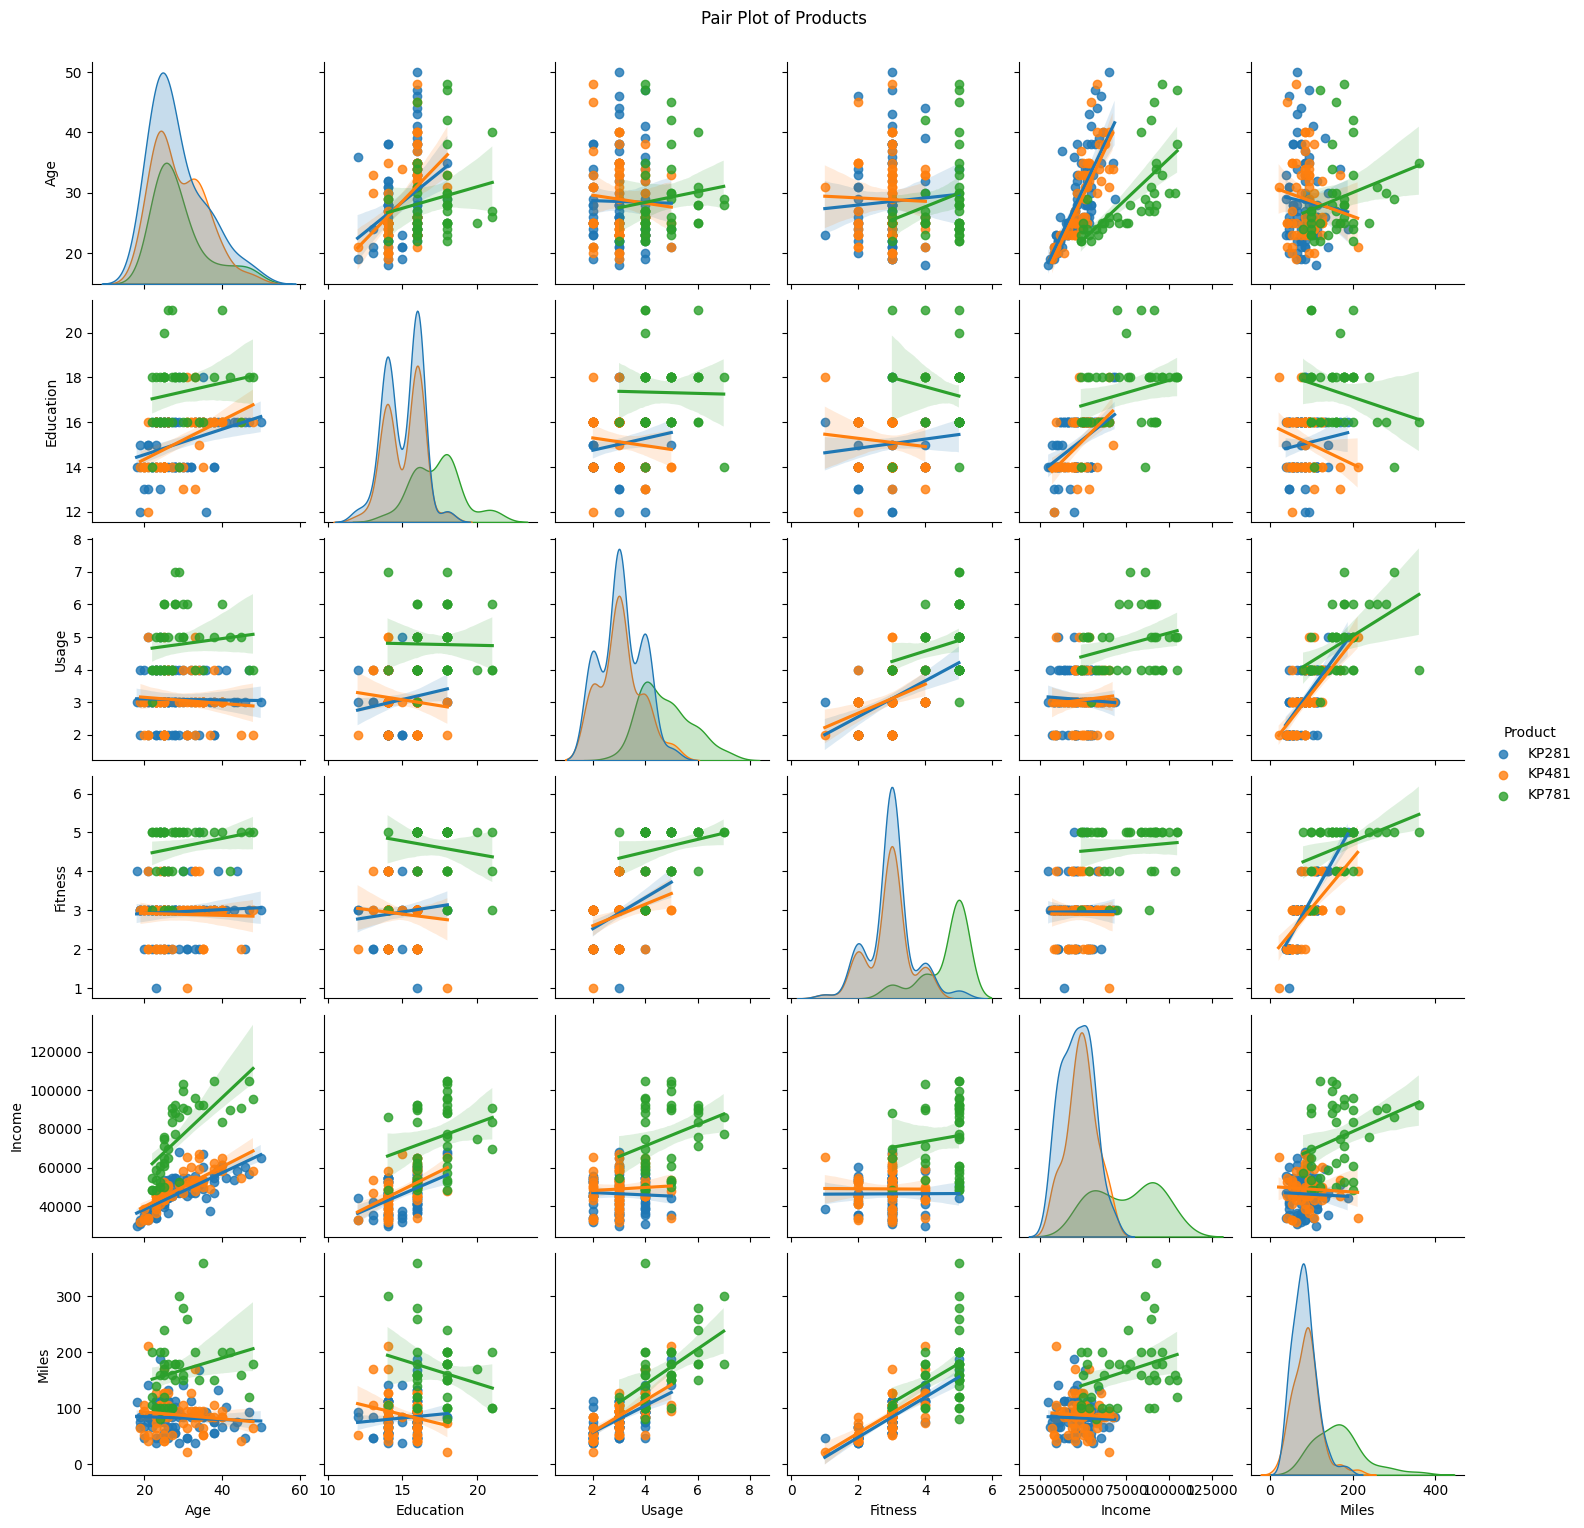

In [ ]:
#Pair Plot of Products

plt.figure(figsize=(10, 5))
sns.pairplot(data=df, hue="Product", kind='reg')

plt.suptitle("Pair Plot of Products", y=1.02)

plt.show()

<Figure size 1000x500 with 0 Axes>

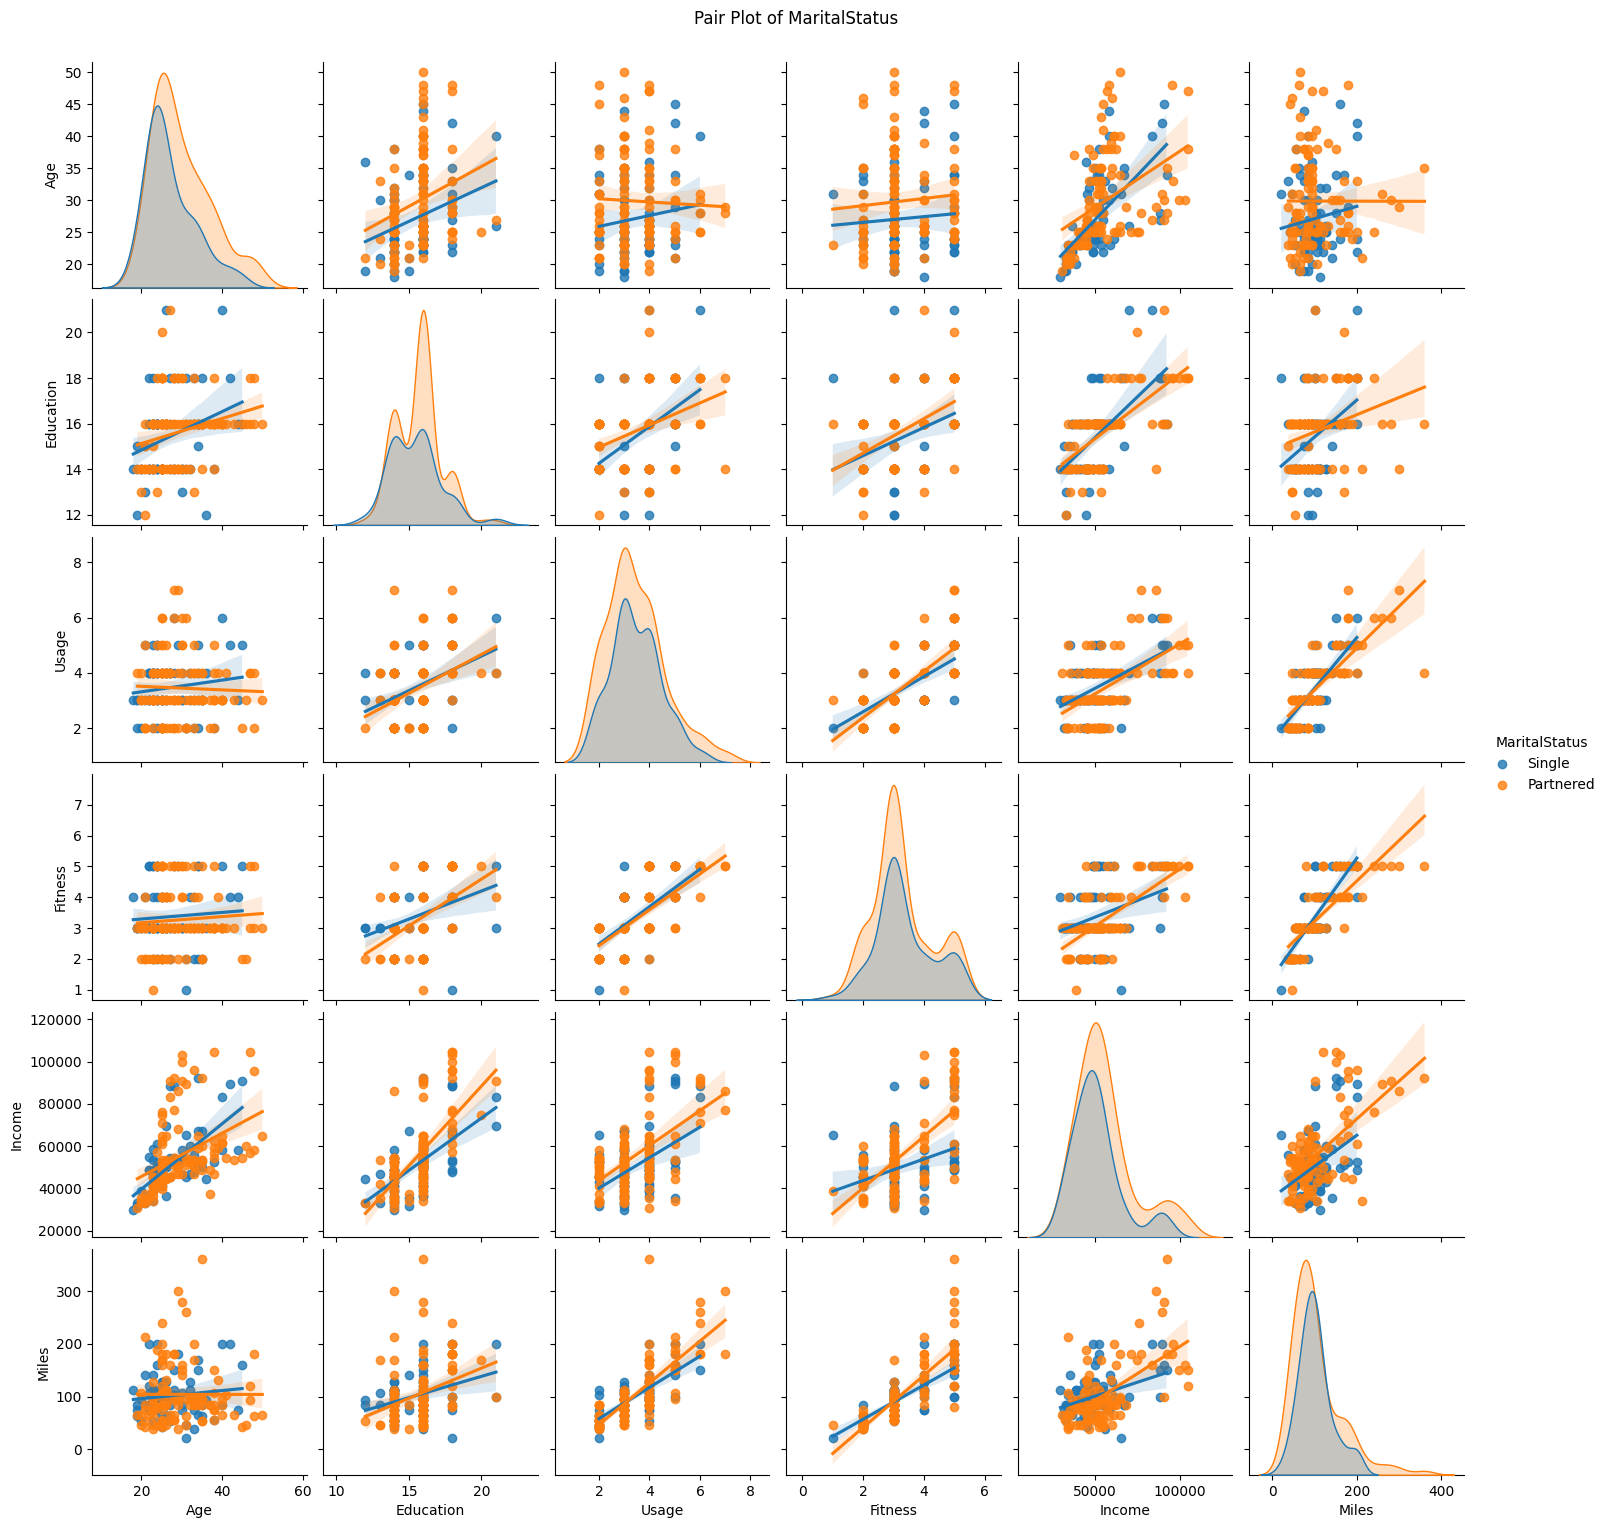

In [49]:
#Pair Plot of MaritalStatus

plt.figure(figsize=(10, 5))
sns.pairplot(data=df, hue="MaritalStatus", kind='reg')

plt.suptitle("Pair Plot of MaritalStatus", y=1.02)

plt.show()

<Figure size 1000x500 with 0 Axes>

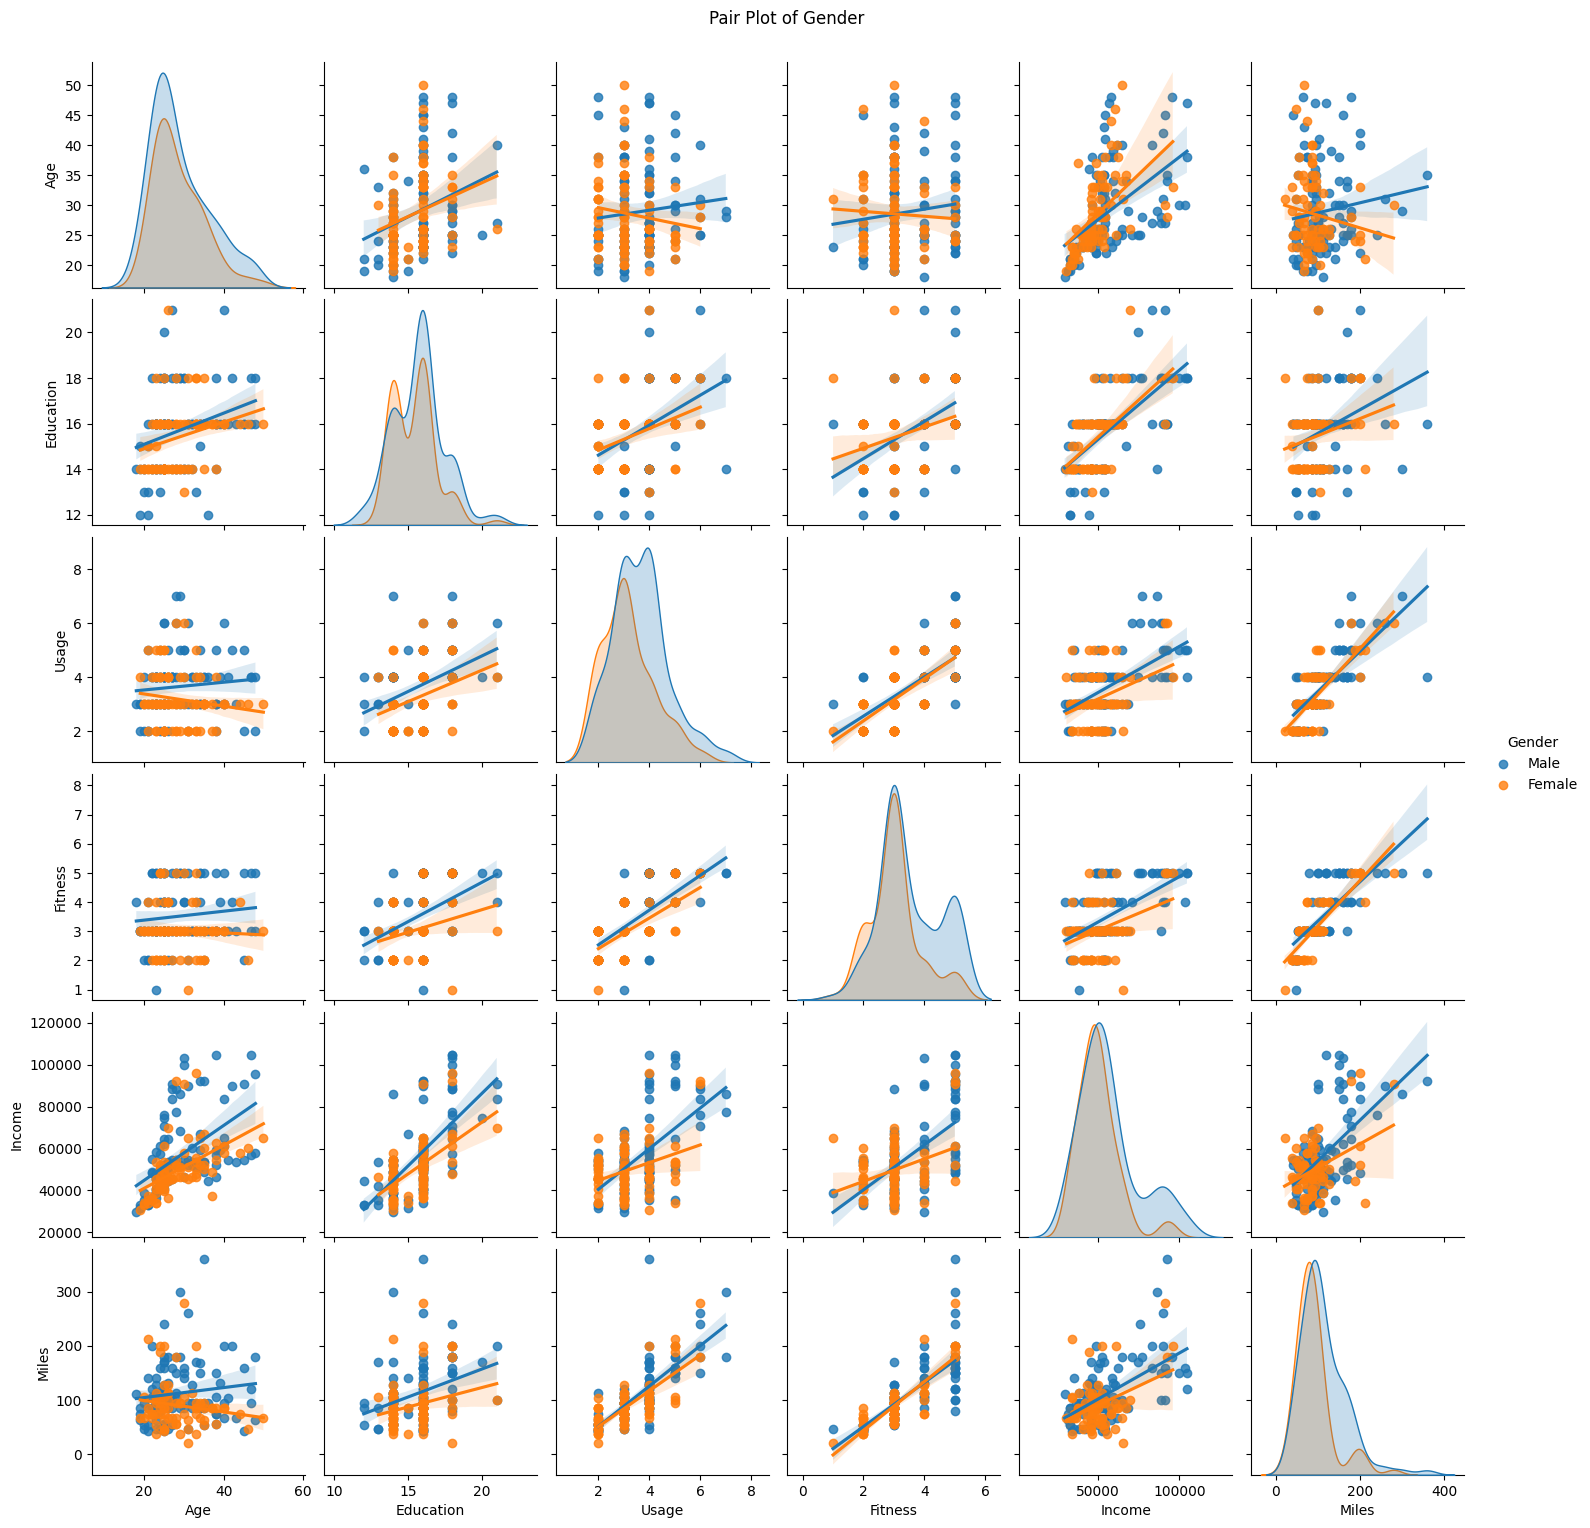

In [50]:
#Pair Plot of Gender

plt.figure(figsize=(10, 5))
sns.pairplot(data=df, hue="Gender", kind='reg')

plt.suptitle("Pair Plot of Gender", y=1.02)

plt.show()

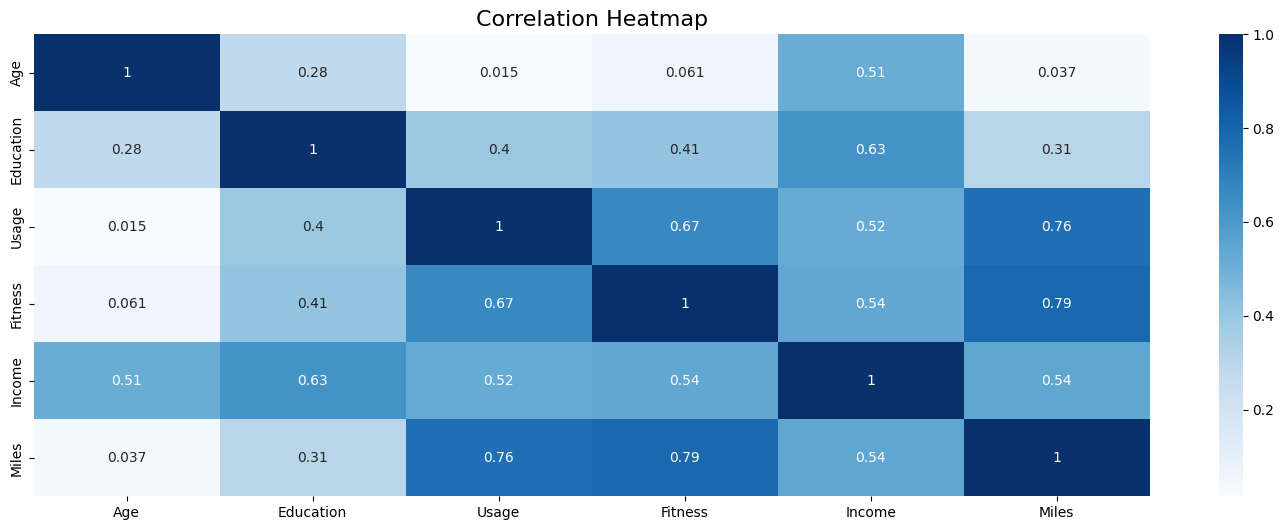

In [35]:
#Correlation Heatmap:

df_numeric = df.select_dtypes(include=['int64'])
plt.figure(figsize=(18, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="Blues")

# Set title for the heatmap
plt.title("Correlation Heatmap", fontsize=16)


# Show the plot
plt.show()

# **Probablity❓/💯**

# **Marginal probability👉**

In [6]:
#Marginal probability of Products:

product_value_counts = ((df["Product"].value_counts(normalize=True)) * 100).round(2)
product_value_counts_df = pd.DataFrame(product_value_counts)
product_value_counts_df.columns = ['Percentage']
styled_table = product_value_counts_df.style.background_gradient(cmap='Blues').format("{:.2f}")
styled_table

,Percentage
KP281,44.44
KP481,33.33
KP781,22.22


In [7]:
#Marginal probability of Gender:

Gender_value_counts = ((df["Gender"].value_counts(normalize = True)) *100).round(2)
Gender_value_counts_df = pd.DataFrame(Gender_value_counts)
Gender_value_counts_df.columns = ['Percentage']
styled_table = Gender_value_counts_df.style.background_gradient(cmap='Blues').format("{:.2f}")
styled_table

,Percentage
Male,57.78
Female,42.22


In [8]:
#Marginal probability of MaritalStatus:

MaritalStatus_value_counts = ((df["MaritalStatus"].value_counts(normalize = True)) *100).round(2)
MaritalStatus_value_counts_df = pd.DataFrame(MaritalStatus_value_counts)
MaritalStatus_value_counts_df.columns = ['Percentage']
styled_table = MaritalStatus_value_counts_df.style.background_gradient(cmap='Blues').format("{:.2f}")
styled_table

,Percentage
Partnered,59.44
Single,40.56


In [9]:
#Marginal probability of Fitness_Shape:

Fitness_Shape_value_counts = ((df["Fitness_Shape"].value_counts(normalize = True)) *100).round(2)
Fitness_Shape_value_counts_df = pd.DataFrame(Fitness_Shape_value_counts)
Fitness_Shape_value_counts_df.columns = ['Percentage']
styled_table = Fitness_Shape_value_counts_df.style.background_gradient(cmap='Blues').format("{:.2f}")
styled_table

,Percentage
Average,53.89
Excellent,17.22
Bad,14.44
Good,13.33
Poor,1.11


# **Conditional probability👉**


# **Product with gender ♂/♀**


In [40]:
#Cross tab on Product and Gender:

Pob_P_G1 = round(pd.crosstab(index=df["Product"], columns=df["Gender"], margins = True, normalize=True)*100,2)
Pob_P_G1

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


In [41]:
#Cross tab on Product and Gender:

Pob_P_G2 = round(pd.crosstab(index=df["Product"], columns=df["Gender"], normalize="columns") * 100, 2)
Pob_P_G2

Gender,Female,Male
Product,,
KP281,52.63,38.46
KP481,38.16,29.81
KP781,9.21,31.73


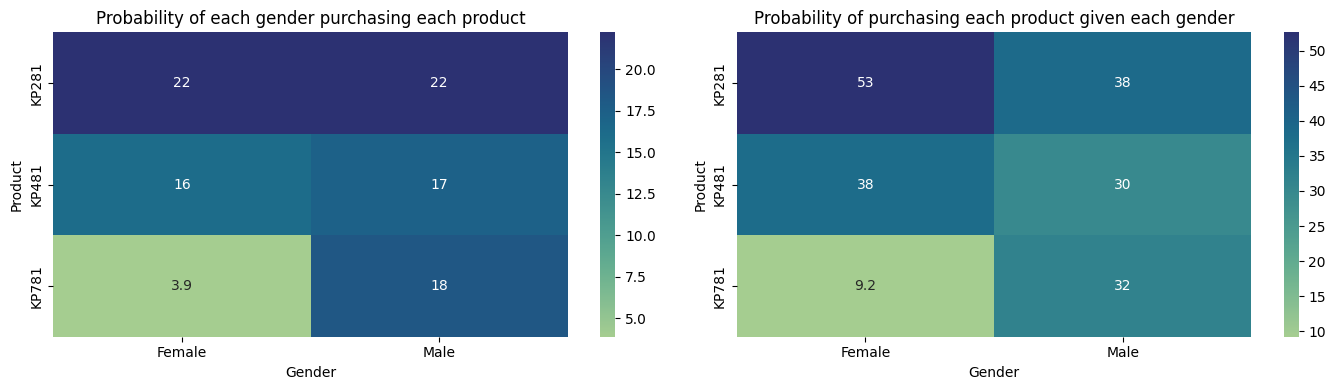

In [42]:
#Representation of the above table in the form of heatmap:

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.heatmap(round(pd.crosstab(index=df["Product"], columns=df["Gender"],normalize=True)*100,2), annot=True, cmap="crest")
plt.title("Probability of each gender purchasing each product")

plt.subplot(1,2,2)
sns.heatmap(round(pd.crosstab(index=df["Product"], columns=df["Gender"],normalize="columns")*100,2), annot=True, cmap="crest")
plt.title("Probability of purchasing each product given each gender")

plt.tight_layout()
plt.show()

**🔍OBSERVATION for KP281 treadmill🔎**


1). The overall Probabilities of purchase of KP281 is an entry-level treadmill is **44%**

* The probablity of **Male** is **22%**
* The probablity of **Female** is **22%**

Therefore we can conclude that both men and women are **equally preferring** **KP281** at overall level.

2). The overall Probabilitiy of Male for all treadmill is 58%

* Among all Male the probability of preferring KP281 ie) **P(KP281|Male) is 38%**

3). The overall Probabilitiy of Female for all treadmill is 42%

* Among all Female the probability of preferring KP281 ie) **P(KP281|Female) is 53%**

From point 2 and 3 we can conclude that most of the **Female purchasing KP281 is more than Male**.


**CONCLUSION😃**

 * 🥇 The **first target**🎯 should for **KP281** treadmill should be **Female ♀**
 * 🥈 The **Second target**🎯 should for **KP281** treadmill should be **Male ♂**


**🔍OBSERVATION for KP481 treadmill🔎**

1). The overall Probabilities of purchase of KP481 is an entry-level treadmill is **33%**

* The probablity of **Male** is **17%**
* The probablity of **Female** is **16%**

Therefore we can conclude that both men and women are **almost equally preferring** **KP481** at overall level.

2). The overall Probabilitiy of Male for all treadmill is 58%

* Among all Male the probability of preferring KP481 ie) **P(KP481|Male) is 30%**

3). The overall Probabilitiy of Female for all treadmill is 42%

* Among all Female the probability of preferring KP481 ie) **P(KP481|Female) is 38%**

From point 2 and 3 we can conclude that most of the **Female purchasing KP481 is more than Male**.


**CONCLUSION😃**

 * 🥇 The **first target**🎯 should for **KP481** treadmill should be **Female ♀**
 * 🥈 The **Second target**🎯 should for **KP481** treadmill should be **Male ♂**

**🔍OBSERVATION for KP781 treadmill🔎**

1). The overall Probabilities of purchase of KP781 is an entry-level treadmill is **22%**

* The probablity of **Male** is **18%**
* The probablity of **Female** is **4%**

Therefore we can conclude that **men are preferring KP781** more than female at overall level.

2). The overall Probabilitiy of Male for all treadmill is 58%

* Among all Male the probability of preferring KP781 ie) **P(KP781|Male) is 32%**

3). The overall Probabilitiy of Female for all treadmill is 42%

* Among all Female the probability of preferring KP781 ie) **P(KP781|Female) is 9%**

From point 2 and 3 we can conclude that most of the **Male purchasing KP781 is more than Female**.


**CONCLUSION😃**
 * 🥇 The **first target**🎯 should for **KP781** treadmill should be **Male ♂**
 * 🥈 The **Second target**🎯should for **KP781** treadmill should be **Female ♀**

# **Product with Marital Status👫**

In [43]:
#Cross tab on Product and MaritalStatus:

Pob_P_M1 = round(pd.crosstab(index=df["Product"], columns=df["MaritalStatus"], margins = True, normalize=True)*100,2)
Pob_P_M1

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.67,17.78,44.44
KP481,20.00,13.33,33.33
KP781,12.78,9.44,22.22
All,59.44,40.56,100.00


In [44]:
#Cross tab on Product and MaritalStatus:

Pob_P_M2 = round(pd.crosstab(index=df["Product"], columns=df["MaritalStatus"], normalize="columns") * 100, 2)
Pob_P_M2

MaritalStatus,Partnered,Single
Product,,
KP281,44.86,43.84
KP481,33.64,32.88
KP781,21.50,23.29


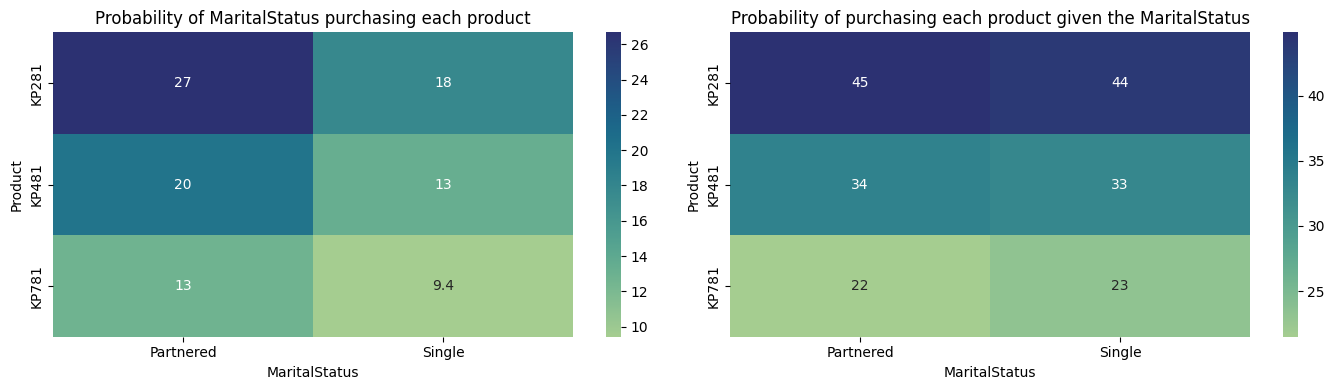

In [45]:
#Representation of the above table in the form of heatmap:

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.heatmap(round(pd.crosstab(index=df["Product"], columns=df["MaritalStatus"],normalize=True)*100,2), annot=True, cmap="crest")
plt.title("Probability of MaritalStatus purchasing each product")

plt.subplot(1,2,2)
sns.heatmap(round(pd.crosstab(index=df["Product"], columns=df["MaritalStatus"],normalize="columns")*100,2), annot=True, cmap="crest")
plt.title("Probability of purchasing each product given the MaritalStatus")

plt.tight_layout()
plt.show()

**🔍OBSERVATION for KP281 treadmill🔎**


1). The overall Probabilities of purchase of KP281 is an entry-level treadmill is **44%**

* The probablity of **Partnered** is **27%**
* The probablity of **Single** is **18%**

Therefore we can conclude that **Partnered people are preferring KP281** more than Single at overall level.

2). The overall Probabilitiy of Partnered for all treadmill is 59%

* Among all Partnered the probability of preferring KP281 ie) **P(KP281|Partnered) is 45%**

3). The overall Probabilitiy of Single for all treadmill is 41%

* Among all Single the probability of preferring KP281 ie) **P(KP281|Single) is 44%**

From point 2 and 3 we can conclude that **both Partnered and Single prefer KP281
treadmill equally but Partnered is little bit high**

**CONCLUSION😃**

 * **Both Partnered and Single** are the targets🎯 for **KP281 treadmill**.

**🔍OBSERVATION for KP481 treadmill🔎**


1). The overall Probabilities of purchase of KP481 treadmill is **33%**

* The probablity of **Partnered** is **20%**
* The probablity of **Single** is **13%**

Therefore we can conclude that **Partnered people are preferring KP481** more than Single at overall level.

2). The overall Probabilitiy of Partnered for all treadmill is 59%

* Among all Partnered the probability of preferring KP481 ie) **P(KP481|Partnered) is 34%**

3). The overall Probabilitiy of Single for all treadmill is 41%

* Among all Single the probability of preferring KP481 ie) **P(KP481|Single) is 33%**

From point 2 and 3 we can conclude that **both Partnered and Single prefer KP481
treadmill equally but Partnered is little bit high**

**CONCLUSION😃**

 * **Both Partnered and Single** are the targets🎯 for **KP481 treadmill**.

**🔍OBSERVATION for KP781 treadmill🔎**


1). The overall Probabilities of purchase of KP781 treadmill is **22%**

* The probablity of **Partnered** is **13%**
* The probablity of **Single** is **9%**

Therefore we can conclude that **Partnered people are preferring KP781** more than Single at overall level.

2). The overall Probabilitiy of Partnered for all treadmill is 59%

* Among all Partnered the probability of preferring KP781 ie) **P(KP781|Partnered) is 22%**

3). The overall Probabilitiy of Single for all treadmill is 41%

* Among all Single the probability of preferring KP781 ie) **P(KP781|Single) is 23%**

From point 2 and 3 we can conclude that **both Partnered and Single prefer KP781
treadmill equally but Single is little bit high**

**CONCLUSION😃**

 * **Both Partnered and Single** are the targets🎯 for **KP781 treadmill**.


# **Product with Fitness Shape💪**

In [46]:
#Cross tab on Product and Fitness_Shape:

Pob_P_F1 = round(pd.crosstab(index=df["Product"], columns=df["Fitness_Shape"], margins = True, normalize=True)*100,2)
Pob_P_F1

Fitness_Shape,Average,Bad,Excellent,Good,Poor,All
Product,,,,,,
KP281,30.00,7.78,1.11,5.00,0.56,44.44
KP481,21.67,6.67,0.00,4.44,0.56,33.33
KP781,2.22,0.00,16.11,3.89,0.00,22.22
All,53.89,14.44,17.22,13.33,1.11,100.00


In [47]:
#Cross tab on Product and Fitness_Shape:

Pob_P_F2 = round(pd.crosstab(index=df["Product"], columns=df["Fitness_Shape"], normalize="columns") * 100, 2)
Pob_P_F2

Fitness_Shape,Average,Bad,Excellent,Good,Poor
Product,,,,,
KP281,55.67,53.85,6.45,37.50,50.0
KP481,40.21,46.15,0.00,33.33,50.0
KP781,4.12,0.00,93.55,29.17,0.0


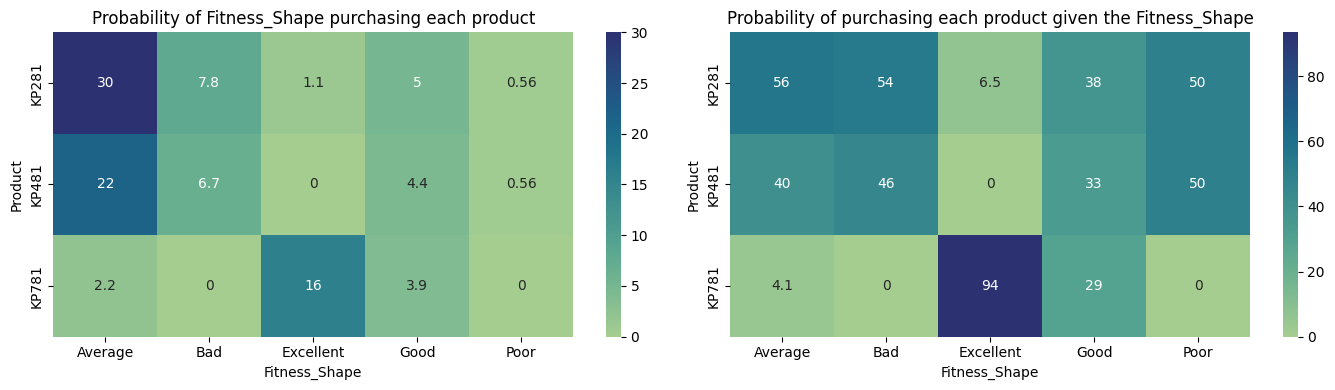

In [48]:
#Representation of the above table in the form of heatmap:

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.heatmap(round(pd.crosstab(index=df["Product"], columns=df["Fitness_Shape"],normalize=True)*100,2), annot=True, cmap="crest")
plt.title("Probability of Fitness_Shape purchasing each product")

plt.subplot(1,2,2)
sns.heatmap(round(pd.crosstab(index=df["Product"], columns=df["Fitness_Shape"],normalize="columns")*100,2), annot=True, cmap="crest")
plt.title("Probability of purchasing each product given the Fitness_Shape")

plt.tight_layout()
plt.show()

**🔍OBSERVATION for KP281 treadmill🔎**

1) The overall probability of purchase of KP281 is **44%**

* The probability of **Average shape**🎯 people purchasing it is **30%**

* The probability of **Bad shape** people purchasing it is **8%**

* The probability of **Excellent Shape** people purchasing it is **1%**

* The probability of **Good Shape** people purchasing it is **5%**

* The probability of **Poor Shape** people purchasing it is **0.5%**

Therefore we can conclude that the people with the **Average shape people are preferring KP281 more**

2) The overall Probablity of Average shape people purchasing all treadmill is 54%

* Among all Average shape people the probablity of KP281 ie) **P(KP281|Average shape)🎯 is 56%**

3) The overall Probablity of Bad shape people purchasing all treadmill 14%

* Among all Bad shape people the probablity of KP281 ie) **P(KP281|Bad shape)🎯 is 54%**

4) The overall Probablity of Excellent shape people purchasing all treadmill 17%

* Among all Excellent shape people the probablity of KP281 ie) **P(KP281|Excellent shape) is 6.5%**

5) The overall Probablity of Good shape people purchasing all treadmill 13%

* Among all Good shape people the probablity of KP281 ie) **P(KP281|Good shape)🎯 is 38%**

6) The overall Probablity of Poor shape people purchasing all treadmill 1%

* Among all Poor shape people the probablity of KP281 ie) **P(KP281|Poor shape)🎯 is 50%**

**CONCLUSION😀**

**Average, Bad, Good and Poor Shape people** are the targets for **KP281 treadmill** and among those the **first target is Average Shape people**🎯

**🔍OBSERVATION for KP481 treadmill🔎**

1) The overall probability of purchase of KP481 is **33%**

* The probability of **Average shape**🎯 people purchasing it is **22%**

* The probability of **Bad shape** people purchasing it is **7%**

* The probability of **Excellent Shape** people purchasing it is **0%**

* The probability of **Good Shape** people purchasing it is **4%**

* The probability of **Poor Shape** people purchasing it is **0.5%**

Therefore we can conclude that the **Average shape people are preferring KP481 more**

2) The overall Probablity of Average shape people purchasing all treadmill is 54%

* Among all Average shape people the probablity of KP481 ie) **P(KP481|Average shape)🎯 is 40%**

3) The overall Probablity of Bad shape people purchasing all treadmill 14%

* Among all Bad shape people the probablity of KP481 ie) **P(KP481|Bad shape)🎯 is 46%**

4) The overall Probablity of Excellent shape people purchasing all treadmill 17%

* Among all Excellent shape people the probablity of KP481 ie) **P(KP481|Excellent shape) is 0%**

5) The overall Probablity of Good shape people purchasing all treadmill 13%

* Among all Good shape people the probablity of KP481 ie) **P(KP481|Good shape)🎯 is 33%**

6) The overall Probablity of Poor shape people purchasing all treadmill 1%

* Among all Poor shape people the probablity of KP481 ie) **P(KP481|Poor shape)🎯 is 50%**

**CONCLUSION😀**

**Average, Bad, Good and Poor Shape people** are the targets for **KP481 treadmill** and among those the **first target is Bad Shape people**🎯

**🔍OBSERVATION for KP781 treadmill🔎**

1) The overall probability of purchase of KP781 is **22%**

* The probability of **Average shape** people purchasing it is **2%**

* The probability of **Bad shape** people purchasing it is **0%**

* The probability of **Excellent Shape**🎯 people purchasing it is **16%**

* The probability of **Good Shape** people purchasing it is **4%**

* The probability of **Poor Shape** people purchasing it is **0%**

Therefore we can conclude that the **Excellent shape people are preferring KP781 more**

2) The overall Probablity of Average shape people purchasing all treadmill is 54%

* Among all Average shape people the probablity of KP781 ie) **P(KP781|Average shape) is 4%**

3) The overall Probablity of Bad shape people purchasing all treadmill 14%

* Among all Bad shape people the probablity of KP781 ie) **P(KP781|Bad shape) is 0%**

4) The overall Probablity of Excellent shape people purchasing all treadmill 17%

* Among all Excellent shape people the probablity of KP781 ie) **P(KP781|Excellent shape)🎯 is 93%**

5) The overall Probablity of Good shape people purchasing all treadmill 13%

* Among all Good shape people the probablity of KP781 ie) **P(KP781|Good shape)🎯 is 29%**

6) The overall Probablity of Poor shape people purchasing all treadmill 1%

* Among all Poor shape people the probablity of KP781 ie) **P(KP781|Poor shape) is 0%**

**CONCLUSION😀**

**Excellent and Good Shape people** are the targets for **KP781 treadmill** and among those the **first target is Excellent Shape people**🎯

# **Customer Profile👉**

# **🥇For KP281 Treadmill🏃**

* It is an entry-level treadmill that sells for **$1,500**.
* It has contributed about **44%** of the overall sales.
* **Both Male and Female** with age of **26 years** are equally preferring KP281 Treadmill.
* Regarding Fitness preference,
  * First - **Average shape (3)** people.
  * Second - **Bad shape (2)** people.
  * Third - **good shape (4)** people.
* Regarding Education preference,
  * First - **16 years**.
  * Second - **14 years**.
  * Third - **15 years**.
* Regarding Usage preference,
  * First - **3 times a week**.
  * Second - **4 times a week**.
  * Third - **2 times a week**.
* The median income of **male and female having 46000 USD** prefer KP281 treadmill and the **male income is little bit high than female**.
* The median income of **single having 44000 USD and partnered having 47000 USD** prefer KP281 treadmill and the **partnered having more income higher than single** prefer KP281.
* Regarding gender preference,
  * First - **Female**
  * Second - **Male**
* Regarding Marital Status preference, **Both Partnered and Single** are the targets for KP281 treadmill.


# **🥈For KP481 Treadmill🏃**

* It is a mid-level treadmill that sell for **$1,750**.
* It has contributed about **33%** of the overall sales.
* The median age of **Male having 25 years** and **Female having 29 years** are preferring KP481 Treadmill.
* Regarding Fitness preference,
  * First - **Bad shape (2)** people.
  * Second - **Average shape (3)** people.
  * Third - **good shape (4)** people.
* Regarding Education preference,
  * First - **16 years**.
  * Second - **14 years**.
  * Third - **13 years**.

* Regarding Usage preference,
  * First - **3 times a week**.
  * Second - **2 times a week**.
  * Third - **4 times a week**.
* The median income of **male having 50000 USD and female having 49000 USD** prefer KP481 treadmill and the male income is little bit high than female.
* The median income of **single having 47000 USD and partnered having 51000 USD** prefer KP481 treadmill and the **partnered having more income higher than single** prefer KP481.
* Regarding gender preference,
  * First - **Female**
  * Second - **Male**
* Regarding Marital Status preference, **Both Partnered and Single** are the targets for KP481 treadmill.


# **🥉For KP781 Treadmill🏃**

* It is the treadmill is having advanced features that sell for **$2,500**.
* It has contributed about **22%** of the overall sales.
* The median age of **Male having 27 years and Female having 26 years** are preferring KP781 Treadmill.
* Regarding Fitness preference,
  * First - **Excellent shape (5)** people.
  * Second - **good shape (4)** people.
  * Third - **Average shape (3)** people
* Regarding Education preference,
  * First - **18 years**.
  * Second - **16 years**.
  * Third - **21 years**.
* Regarding Usage preference,
  * First - **4 times a week**.
  * Second - **5 times a week**.
  *Third - **6 times a week**.
* The median income of **male having 77000 USD and female having 70000 USD** prefer KP781 treadmill and the **male income is high than female**.
* The median income of **single having 59000 USD and partnered having 86000 USD** prefer KP781 treadmill and the partnered having more income higher than single prefer KP781.
* Regarding gender preference,
  * First - **Male**.
  * Second - **Female**.
* Regarding Marital Status preference, **Both Partnered and Single** are the targets for KP281 treadmill.





# **Recommendations🤝**

# **For KP281 and KP481 treadmill💡**

* Since the **price is so attrective** it has good customer base.
* Since it has good number of customers, **continuously innovate, and upgrade** the product to stay ahead of competitors and can get enough feedback to improve further.
* Expand the product line by introducing **variations or complementary products** that appeal to existing customers or attract new ones. This could include offering different sizes, Flavors, colours, or features to cater to diverse preferences.
* Since KP281 and KP481 are more popular product among the average shape customers, create **specialized versions of KP281 and KP481 designed specifically for individuals with average body shapes**. This could include features such as adjustable sizing, ergonomic designs, or customized fit options to enhance comfort and satisfaction.
* **Develop marketing campaigns that promote body positivity**, highlighting how the KP281 and KP481 are suitable for individuals of all body shapes and sizes. Emphasize the benefits of the product in **enhancing confidence, comfort, and self-esteem for those with average body shapes**.
* Since KP281 and KP481 are more popular among female, **develop targeted marketing campaigns that specifically appeal to female consumers**. Utilize channels and messaging that resonate with female interests, preferences, and values to effectively reach and engage this demographic.
* **Collaborate with influencers, or bloggers especially female** who represent average body shapes. Partnering with individuals who promote body positivity and diversity can help amplify the message and reach a wider audience of potential customers.
* **Keep a close eye on competitor activities and market trends within the female consumer segment**. Stay informed about emerging products, innovations, and marketing strategies targeting women and adapt strategies accordingly to maintain a competitive edge.
* Since KP281 and KP481 are **more popular among Partnered than single**, develop marketing content and messaging that emphasizes the benefits of KP281 and KP481 for **strengthening relationships and fostering connection between partners**. Highlight how using the product together can create shared memories and deepen emotional bonds.



# **For KP781 treadmill💡**

* It has some advanced features and is suitable for the customers having more **passion about their fitness**.
* Since KP781 is more popular product among the excellent shape customers, **create specialized versions of KP781 designed specifically for individuals with a excellent body shapes**. This could include features such as adjustable sizing, ergonomic designs, or customized fit options to enhance comfort and satisfaction.
* **Emphasize the fitness and performance benefits** of KP781 for individuals with excellent body shapes. Position the product as a tool for **enhancing athletic performance, improving strength, and achieving peak physical condition**.
* Since KP781 is more popular among male, **develop targeted marketing campaigns that specifically appeal to male consumers**. Utilize channels and messaging that resonate with male interests, preferences, and values to effectively reach and engage this demographic.
* **Collaborate with influencers, or bloggers especially male who represent excellent body shapes**. Partnering with individuals who promote body positivity and diversity can help amplify the message and reach a wider audience of potential customers.
* **Keep a close eye on competitor activities and market trends within the male consumer segment**. Stay informed about emerging products, innovations, and marketing strategies targeting men and adapt strategies accordingly to maintain a competitive edge.
* Since KP781 is more popular among Partnered than single, develop marketing content and messaging that emphasizes the benefits of KP781 for **strengthening relationships and fostering connection between partners**. Highlight how using the product together can create shared memories and deepen emotional bonds.
* Since KP781 is more popular among high income people, **offer exclusive access or benefits to high-income consumers** as part of a loyalty program or membership scheme. This could include early access to new product releases, VIP events, personalized services, or concierge support tailored to their needs.


